In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [8]:
price_ini = [49.00,48.12,47.37,50.25,51.75,53.12,53.00,51.87,51.38,53.00,49.88,48.50,49.88,50.37,52.13,51.88,52.87,54.87,54.62,55.87,57.25]
time_ini = [i for i in range(21)]

## 插值填充数据

In [ ]:
#构造平滑数据 3次样条插值
from scipy.interpolate import interp1d
time = np.linspace(0,20,41)
fc = interp1d(time_ini, price_ini, kind='cubic')
price2 = fc(time)

In [ ]:
#构造高波动数据，插入随机数
import random
random_price = [random.uniform(45,60) for i in range(20)]
random_price

## 读入Excel表格，可视化分析

In [3]:
data1 = pd.read_excel('delta_hedge.xlsx',sheetname = 0,skiprows=[0],index_col='周数')
price1 = data1['股票价格']
delta1 = data1['Delta']
cum_cashflow1 = data1['累计现金流（千美元）']
time = data1.index
data1

,股票价格,Delta,购买股票数量,购买股票费用（千美元）,累计现金流（千美元）,利息费用（千美元）
周数,,,,,,
0.0,49.00,0.522,52200.0,2557.800,2557.800000,1.229712
0.5,48.94,0.516,-600.0,-29.364,2529.665712,1.216185
1.0,48.12,0.458,-5800.0,-279.096,2251.785897,1.082589
1.5,47.34,0.401,-5700.0,-269.838,1983.030486,0.953380
2.0,47.37,0.400,-100.0,-4.737,1979.246866,0.951561
2.5,48.66,0.488,8800.0,428.208,2408.406427,1.157888
3.0,50.25,0.596,10800.0,542.700,2952.264315,1.419358
3.5,51.16,0.656,6000.0,306.960,3260.643673,1.567617
4.0,51.75,0.693,3700.0,191.475,3453.686290,1.660426


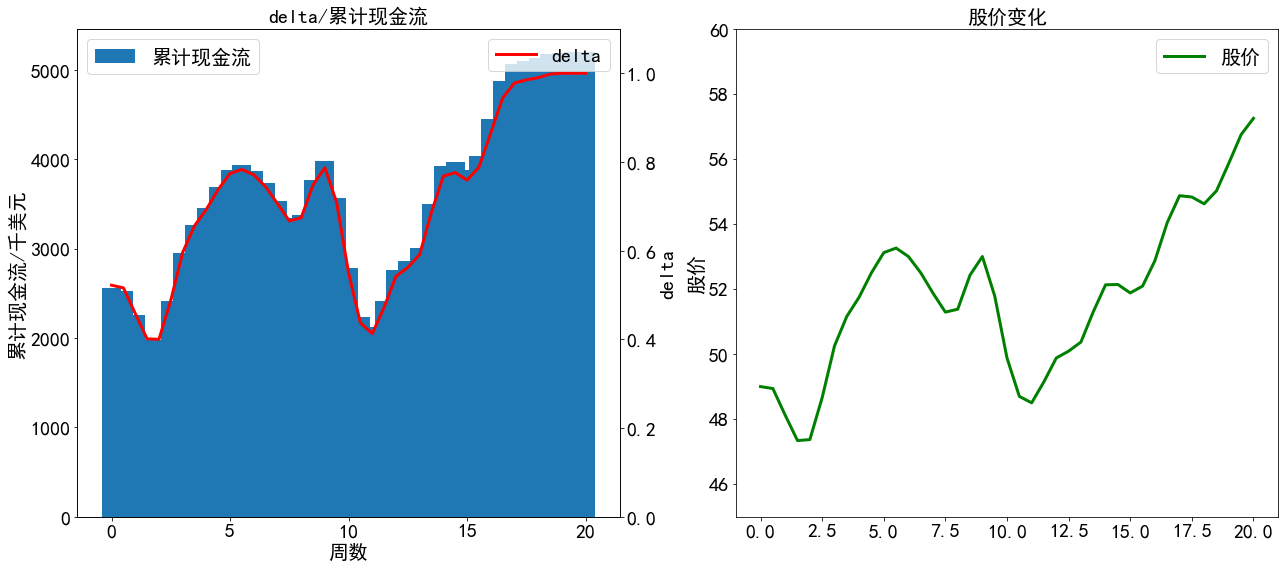

In [4]:
fig = plt.figure(figsize = (18,8))

ax1 = fig.add_subplot(1,2,1)
ax1.bar(time, cum_cashflow1, label = '累计现金流')
ax1.set_xlabel('周数',fontsize = 20)
ax1.set_ylabel('累计现金流/千美元',fontsize = 20)
ax1.legend(loc = 'upper left',fontsize = 20)
ax1.set_title('delta/累计现金流',fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax12 = ax1.twinx()
ax12.plot(time, delta1, color = 'red', label = 'delta',linewidth = '3')
ax12.set_ylabel('delta',fontsize = 20)
ax12.legend(loc = 'upper right',fontsize = 20)
ax12.set_ylim(0,1.1)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax2 = fig.add_subplot(1,2,2)
ax2.plot(time, price1, color = 'green', label = '股价',linewidth = '3')
ax2.set_ylabel('股价',fontsize = 20)
ax2.legend(loc = 'upper right',fontsize = 20)
ax2.set_ylim(45,60)
ax2.set_title('股价变化',fontsize = 20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

In [5]:
data2 = pd.read_excel('delta_hedge.xlsx',sheetname = 1,skiprows=[0],index_col='周数')
price2 = data2['股票价格']
delta2 = data2['Delta']
cum_cashflow2 = data2['累计现金流（千美元）']
data2

,股票价格,Delta,购买股票数量,购买股票费用（千美元）,累计现金流（千美元）,利息费用（千美元）
周数,,,,,,
0.0,49.00,0.522,52200.0,2557.800,2557.800000,1.229712
0.5,51.63,0.683,16100.0,831.243,3390.272712,1.629939
1.0,48.12,0.458,-22500.0,-1082.700,2309.202650,1.110194
1.5,50.46,0.612,15400.0,777.084,3087.396844,1.484325
2.0,47.37,0.400,-21200.0,-1004.244,2084.637169,1.002229
2.5,50.50,0.613,21300.0,1075.650,3161.289399,1.519851
3.0,50.25,0.596,-1700.0,-85.425,3077.384249,1.479512
3.5,54.02,0.812,21600.0,1166.832,4245.695761,2.041200
4.0,51.75,0.693,-11900.0,-615.825,3631.911961,1.746112


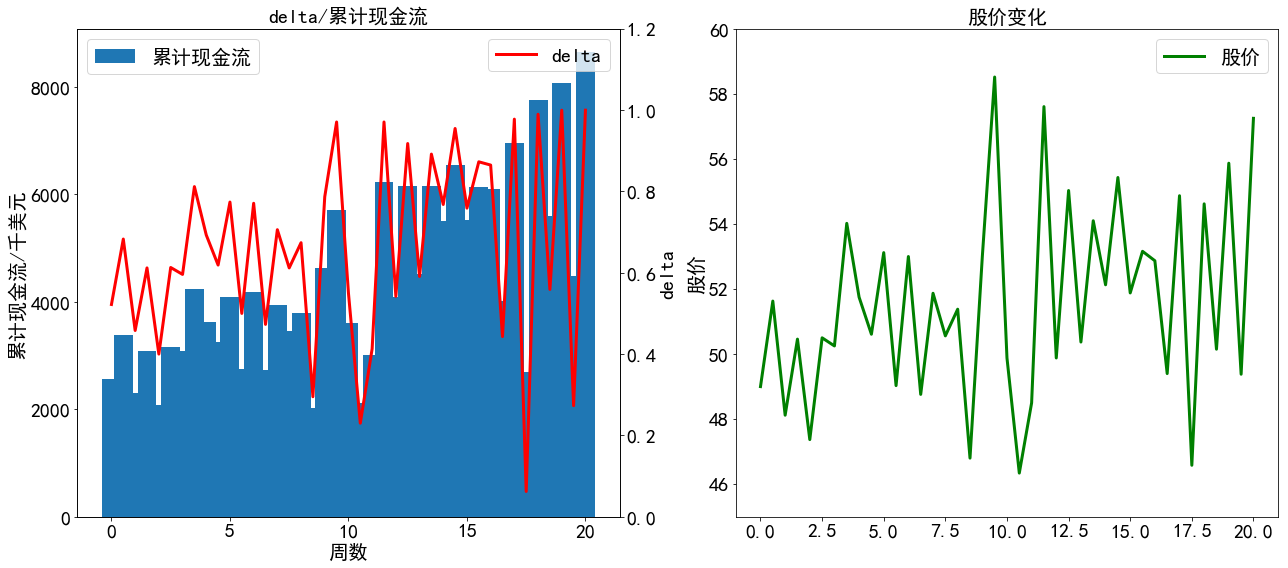

In [6]:
fig = plt.figure(figsize = (18,8))

ax1 = fig.add_subplot(1,2,1)
ax1.bar(time, cum_cashflow2, label = '累计现金流')
ax1.set_xlabel('周数',fontsize = 20)
ax1.set_ylabel('累计现金流/千美元',fontsize = 20)
ax1.legend(loc = 'upper left',fontsize = 20)
ax1.set_title('delta/累计现金流',fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax12 = ax1.twinx()
ax12.plot(time, delta2, color = 'red', label = 'delta',linewidth = '3')
ax12.set_ylabel('delta',fontsize = 20)
ax12.legend(loc = 'upper right',fontsize = 20)
ax12.set_ylim(0,1.2)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax2 = fig.add_subplot(1,2,2)
ax2.plot(time, price2, color = 'green', label = '股价',linewidth = '3')
ax2.set_ylabel('股价',fontsize = 20)
ax2.legend(loc = 'upper right',fontsize = 20)
ax2.set_ylim(45,60)
ax2.set_title('股价变化',fontsize = 20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()

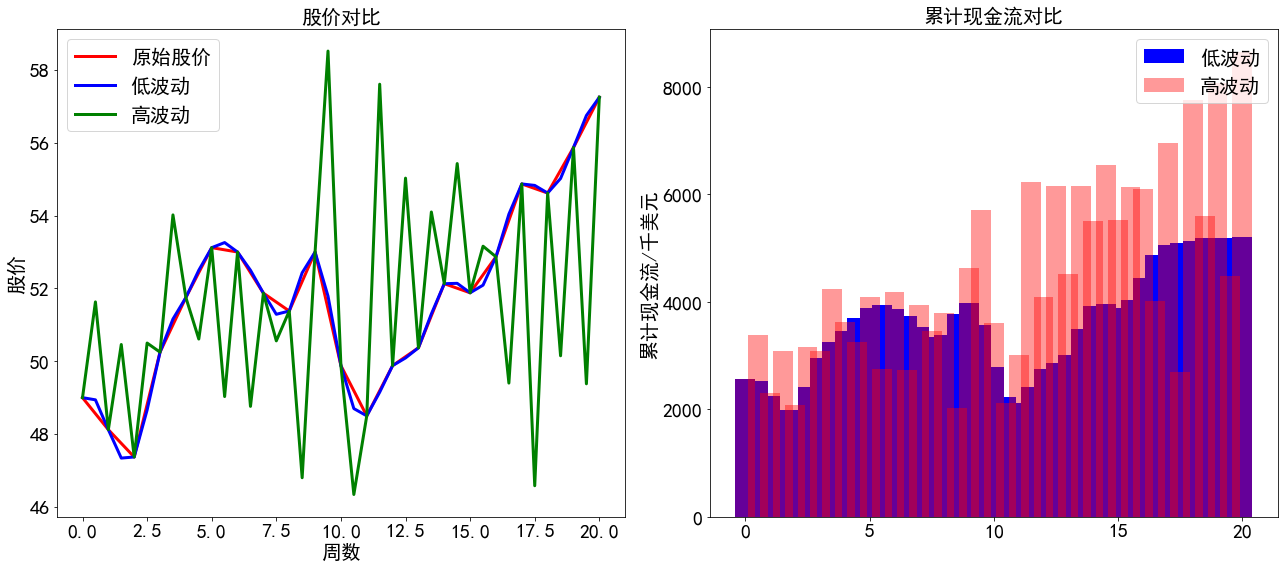

In [10]:
fig = plt.figure(figsize = (18,8))

ax1 = fig.add_subplot(1,2,1)
ax1.plot(time_ini, price_ini, label = '原始股价',color = 'red',linewidth = '3')
ax1.plot(time, price1, label = '低波动',color = 'blue',linewidth = '3')
ax1.plot(time, price2, label = '高波动',color = 'green',linewidth = '3')
ax1.set_xlabel('周数',fontsize = 20)
ax1.set_ylabel('股价',fontsize = 20)
ax1.legend(loc = 'upper left',fontsize = 20)
ax1.set_title('股价对比',fontsize = 20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

ax2 = fig.add_subplot(1,2,2)
ax2.bar(time, cum_cashflow1, color = 'blue', label = '低波动')
ax2.bar(time, cum_cashflow2, color = 'red', label = '高波动',alpha = 0.4)
ax2.set_ylabel('累计现金流/千美元',fontsize = 20)
ax2.legend(loc = 'upper right',fontsize = 20)
ax2.set_title('累计现金流对比',fontsize = 20)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.tight_layout()
plt.show()